# Shopper Spectrum: Customer Segmentation and Product Recommendation in E-Commerce

## Analysis Report

**Domain:** E-Commerce and Retail Analytics  
**Techniques Used:** RFM Analysis, KMeans Clustering, Hierarchical Clustering, Collaborative Filtering  
**Tools:** Python, Pandas, NumPy, Scikit-learn, Seaborn, Matplotlib, Streamlit

## Objective
The objective of this project is to analyze customer purchasing behavior using online retail transaction data, perform customer segmentation based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using item-based collaborative filtering techniques.

## Environment Setup and Library Imports


The following libraries are imported to support data manipulation, numerical computation, and subsequent analysis throughout the project.

In [1]:
import pandas as pd
import numpy as np

## 1. Dataset Understanding

The dataset consists of transactional records from an online retail platform, including invoice details, product information, customer identifiers, and purchase values. An initial inspection was performed to understand the dataset structure, data types, and the presence of missing or invalid values.

### Dataset Loading and Initial Inspection

The dataset was loaded from a CSV file, and an initial preview of the data was performed to examine the structure and sample records.

In [2]:
df = pd.read_csv("../data/online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Dataset Structure and Missing Values

The dataset contains over 500,000 transactional records with eight attributes. The `df.info()` output reveals missing values in the `Description` and `CustomerID` columns. These missing values indicate incomplete transaction records and highlight the need for data preprocessing before further analysis.

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Missing Value Analysis

The output indicates a significant number of missing values in the `CustomerID` column, which suggests that several transactions are not associated with identifiable customers. Additionally, a small number of missing values are present in the `Description` column. These missing values must be handled appropriately during data preprocessing to ensure accurate customer segmentation and recommendation analysis.

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Statistical Summary and Data Quality Insights

The statistical summary reveals the presence of negative values in the `Quantity` and `UnitPrice` columns, which likely correspond to cancelled or erroneous transactions. Additionally, the wide range between minimum and maximum values indicates the presence of outliers. These observations justify the need for data preprocessing to remove invalid records before performing customer segmentation and recommendation analysis.

## 2. Data Preprocessing

To ensure high-quality analysis, the dataset was cleaned by removing records with missing customer identifiers, cancelled invoices, invalid purchase quantities, and negative pricing values. Date fields were converted into appropriate formats, and additional features were engineered to support customer segmentation and recommendation analysis.

### Data Cleaning and Feature Engineering

In [6]:
data = df.copy()

In [7]:
data = data.dropna(subset=["CustomerID"])

In [8]:
data = data[~data["InvoiceNo"].astype(str).str.startswith("C")]

In [9]:
data = data[(data["Quantity"] > 0) & (data["UnitPrice"] > 0)]

In [10]:
data = data.dropna(subset=["Description"])

In [11]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [12]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


### Preprocessing Outcome

After preprocessing, the dataset contains only valid and complete transaction records suitable for customer segmentation and product recommendation analysis.

## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) was conducted to examine purchasing patterns across different countries, identify popular products, analyze transaction trends over time, and understand spending distributions. This analysis provides valuable business insights and prepares the dataset for subsequent feature engineering and modeling.

### Visualization Setup

The following visualization libraries and styles are configured to generate consistent and informative plots for exploratory data analysis.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

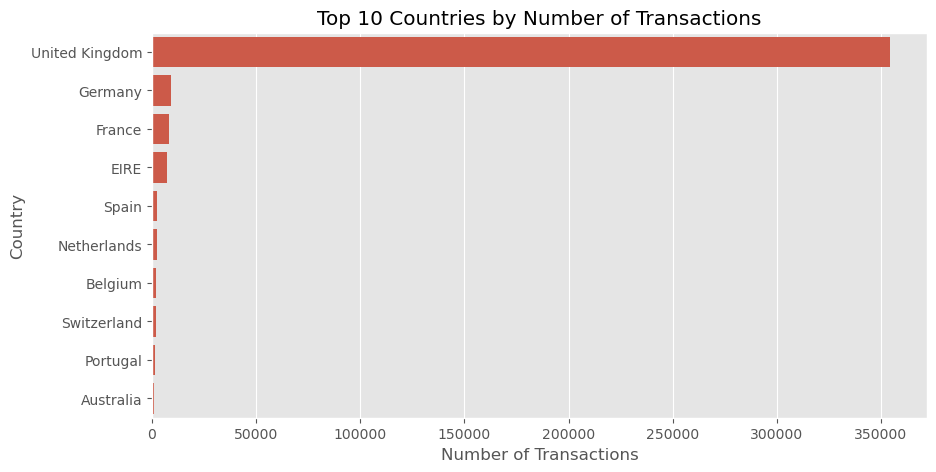

In [15]:
top_countries = data["Country"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

### Country-wise Transaction Analysis

The plot shows that the majority of transactions originate from the United Kingdom, indicating a highly concentrated customer base. Other countries contribute significantly fewer transactions, highlighting potential opportunities for market expansion or targeted international strategies.

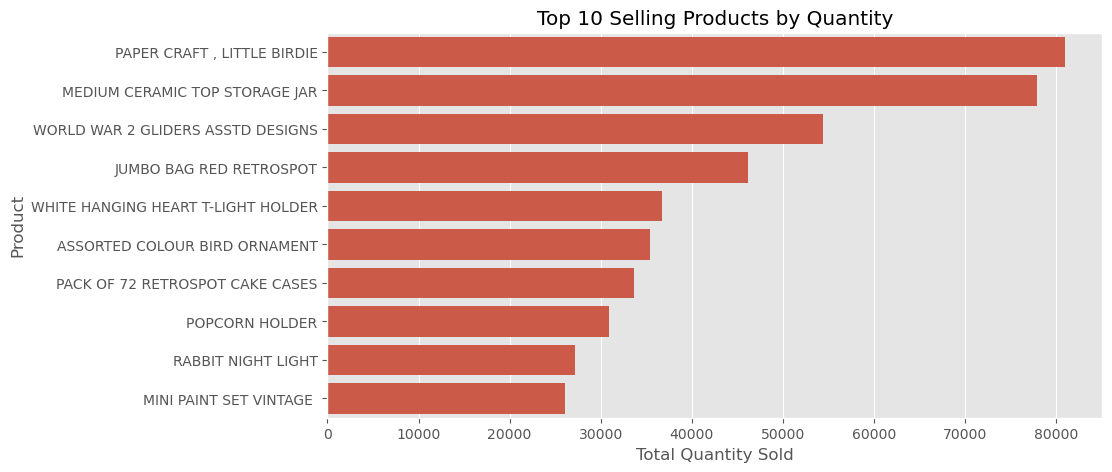

In [16]:
top_products = (
    data.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Selling Products by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()

### Product-wise Sales Analysis

The plot highlights the top-selling products based on total quantity sold. A small number of products contribute significantly to overall sales volume, indicating product popularity concentration. These insights can support inventory planning, promotional strategies, and recommendation system design.

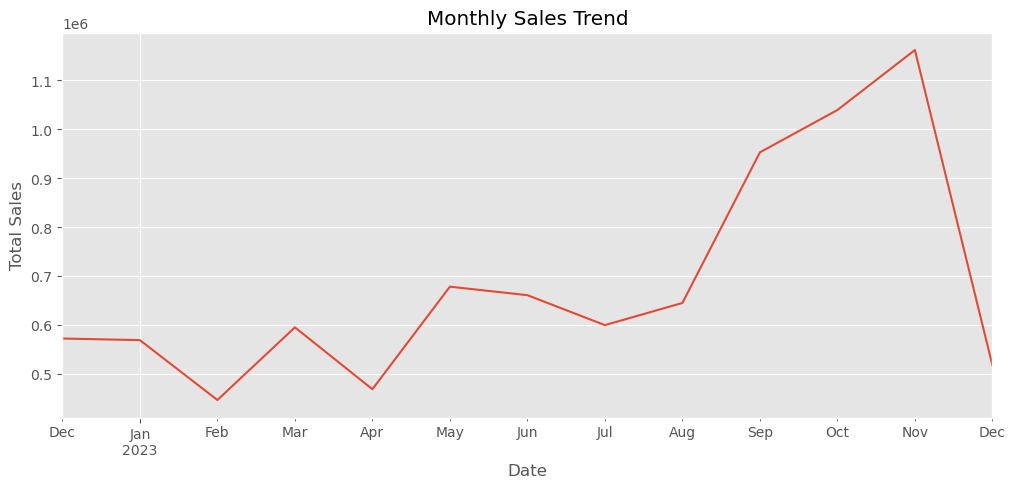

In [17]:
monthly_sales = data.set_index("InvoiceDate")["TotalPrice"].resample("ME").sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

### Monthly Sales Trend Analysis

The monthly sales trend shows seasonal variations in customer purchasing behavior, with a noticeable increase in sales during the later months of the year. The peak observed around October and November may correspond to festive or holiday periods. Such temporal patterns can be leveraged for demand forecasting and strategic promotional planning.

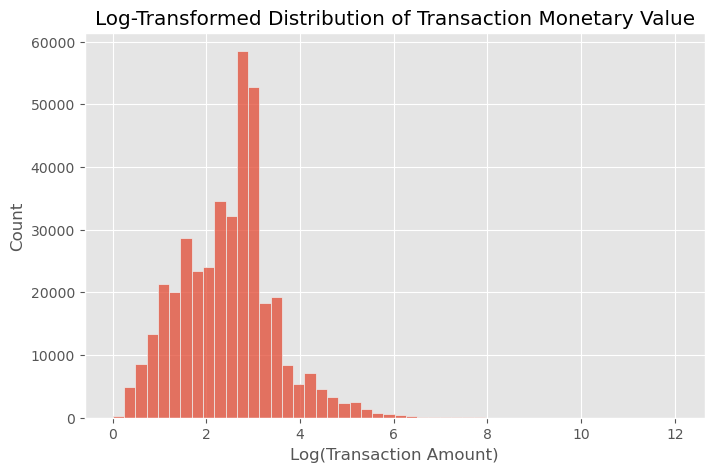

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(data["TotalPrice"]), bins=50)
plt.title("Log-Transformed Distribution of Transaction Monetary Value")
plt.xlabel("Log(Transaction Amount)")
plt.show()

### Transaction Monetary Value Distribution

The log-transformed distribution of transaction monetary values reveals a right-skewed pattern with a long tail of high-value transactions. Applying a logarithmic transformation helps normalize the distribution, making it more suitable for clustering and customer segmentation techniques such as RFM analysis.

## 4. RFM Feature Engineering

Customer behavior was summarized using Recency, Frequency, and Monetary (RFM) metrics. These features aggregate transaction-level data into meaningful customer-level representations, enabling effective segmentation through clustering techniques.

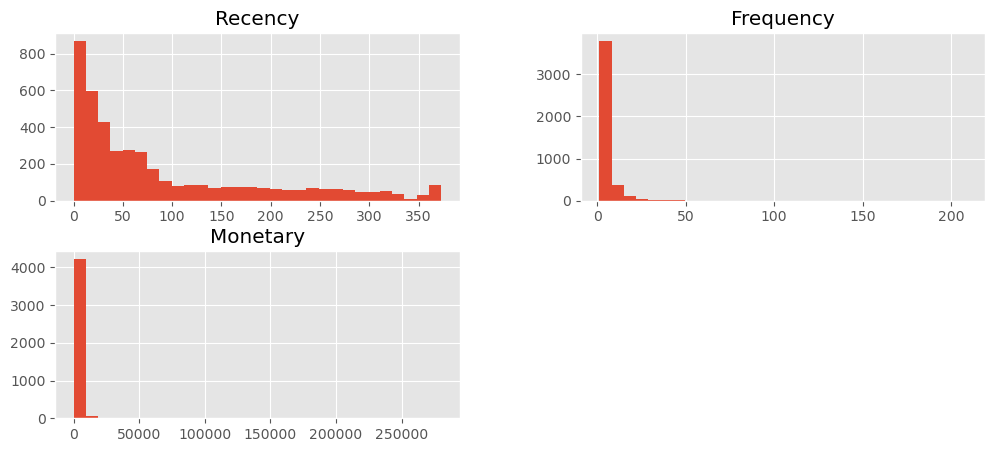

In [19]:
# Create temporary RFM for visualization
rfm_temp = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (data["InvoiceDate"].max() - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})

rfm_temp.columns = ["Recency", "Frequency", "Monetary"]

rfm_temp.hist(figsize=(12,5), bins=30)
plt.show()

### RFM Distribution Analysis

The distributions of Recency, Frequency, and Monetary values show significant skewness, with most customers making infrequent purchases and contributing lower monetary value, while a small number of customers account for high frequency and high spending. These patterns justify the need for feature scaling prior to clustering to ensure balanced segmentation.

In [20]:
snapshot_date = data["InvoiceDate"].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2023-12-10 12:50:00')

In [21]:
rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
})

In [22]:
rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "TotalPrice": "Monetary"
}, inplace=True)

### Final RFM Feature Construction

Using the defined snapshot date, Recency, Frequency, and Monetary features were computed for each customer. These RFM metrics provide a concise summary of customer purchasing behavior and form the basis for subsequent scaling and clustering-based customer segmentation.

In [23]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


### RFM Table Preview

The table above shows a sample of the constructed RFM features for individual customers. These values confirm the successful transformation of transactional data into customer-level metrics required for segmentation and clustering analysis.

In [24]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


### RFM Statistical Summary

The statistical summary indicates significant variation and skewness across Recency, Frequency, and Monetary features. While most customers exhibit low purchase frequency and monetary value, a small number of customers contribute disproportionately high spending. These characteristics highlight the importance of feature scaling prior to clustering to prevent dominance of high-magnitude values.

## 5. RFM Feature Scaling

Since Recency, Frequency, and Monetary values exist on different scales and exhibit significant skewness, feature scaling is required before applying clustering algorithms. Standardization ensures that no single feature dominates distance-based clustering methods such as K-Means.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [27]:
rfm_scaled = pd.DataFrame(
    rfm_scaled,
    index=rfm.index,
    columns=rfm.columns
)

rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.425097,8.358668
12347.0,-0.905340,0.354417,0.250966
12348.0,-0.175360,-0.035340,-0.028596
12349.0,-0.735345,-0.425097,-0.033012
12350.0,2.174578,-0.425097,-0.191347


### Scaled RFM Feature Preview

The scaled RFM values have a mean close to zero and comparable variance across features. This transformation prepares the dataset for effective distance-based clustering by ensuring balanced feature contribution.

In [28]:
import joblib
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

### Why Clustering is Required

Customer transaction data contains diverse purchasing behaviors that are difficult to interpret at an individual level. Clustering enables grouping customers with similar purchasing patterns, allowing businesses to design targeted strategies for retention, promotion, and engagement. RFM-based clustering is particularly effective as it captures recency, loyalty, and customer value simultaneously.

## 6. Customer Segmentation using KMeans Clustering

KMeans clustering was applied on standardized RFM features to segment customers into distinct behavioral groups. The optimal number of clusters was determined using the Elbow Method, supported by silhouette analysis.

In [29]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

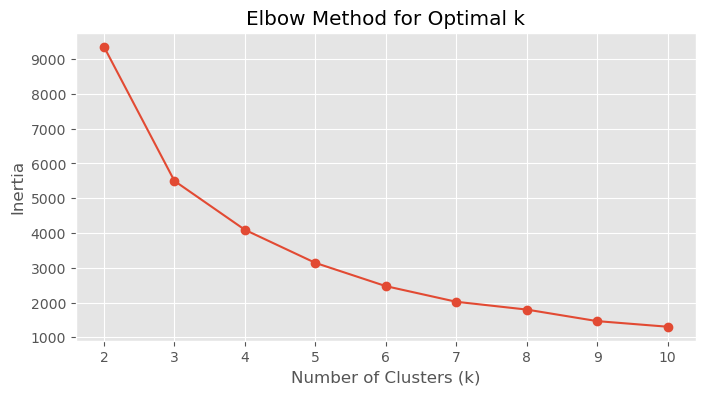

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

### Elbow Method Analysis

The elbow plot shows a noticeable reduction in inertia up to k = 4, after which the rate of improvement slows down. Based on this observation, k = 4 was selected as the optimal number of clusters for KMeans segmentation.

In [31]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

k = 2, Silhouette Score = 0.560
k = 3, Silhouette Score = 0.585
k = 4, Silhouette Score = 0.616
k = 5, Silhouette Score = 0.617
k = 6, Silhouette Score = 0.598


### Cluster Selection Interpretation

The Elbow Method revealed a clear inflection point at k = 4, indicating diminishing returns in inertia reduction beyond this value. Silhouette analysis further supported this choice, with k = 4 achieving a high silhouette score comparable to k = 5. Considering model simplicity, interpretability, and clustering quality, four clusters were selected for final customer segmentation.

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

In [33]:
cluster_summary = rfm.groupby("Cluster").mean()
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [34]:
segment_map = {
    0: "Occasional",
    1: "At-Risk",
    2: "High-Value",
    3: "Regular"
}


rfm["Segment"] = rfm["Cluster"].map(segment_map)

### Customer Segment Interpretation

Based on the average RFM values of each cluster, meaningful customer segments were identified.  
High-Value customers exhibit very recent activity, high purchase frequency, and high monetary contribution.  
Regular customers demonstrate consistent engagement with moderate to high spending.  
Occasional customers show moderate purchase behavior with lower frequency and spending.  
At-Risk customers are characterized by long periods of inactivity, low purchase frequency, and minimal monetary contribution.  

These segments enable targeted marketing strategies and personalized customer engagement.

In [35]:
rfm["Segment"].value_counts()

Segment
Occasional    3054
At-Risk       1067
Regular        204
High-Value      13
Name: count, dtype: int64

### Segment Distribution

The distribution above highlights the proportion of customers belonging to each segment, indicating that a small group of high-value customers contributes disproportionately to overall revenue.

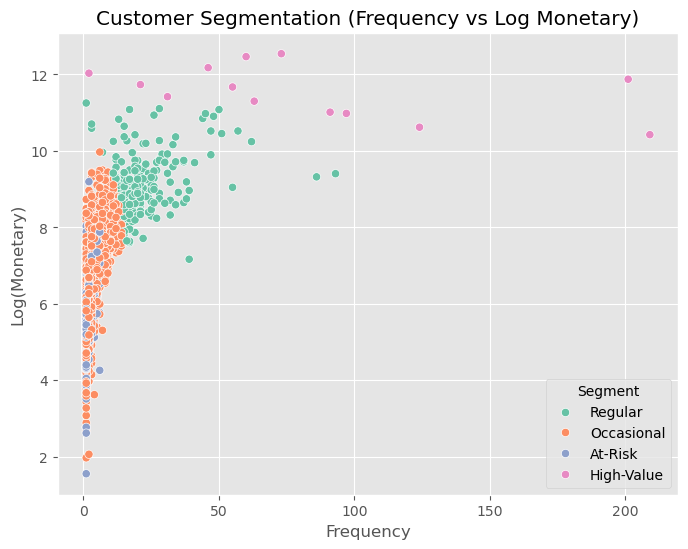

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=rfm["Frequency"],
    y=np.log1p(rfm["Monetary"]),
    hue=rfm["Segment"],
    palette="Set2"
)
plt.title("Customer Segmentation (Frequency vs Log Monetary)")
plt.ylabel("Log(Monetary)")
plt.show()

### Segment Visualization Insight

The scatter plot demonstrates clear separation between customer segments based on purchase frequency and log-transformed monetary value.  
High-Value customers are concentrated in regions of high purchase frequency and high spending, while At-Risk customers cluster around low frequency and low monetary contribution.  
Regular customers exhibit moderate to high frequency with consistent spending, whereas Occasional customers show low purchase frequency with moderate monetary value.  
This visualization confirms the effectiveness of RFM-based KMeans segmentation in distinguishing meaningful customer behavior patterns.

## 7. Model Persistence for Deployment

To enable future reuse and deployment of the trained customer segmentation model, the fitted KMeans clustering model and the feature scaler were serialized and saved. These artifacts can be loaded later for real-time customer segmentation within a web application or production environment.

In [37]:
import joblib

joblib.dump(kmeans, "../models/kmeans_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

## 8. Clustering Algorithm Comparison

To validate the segmentation results, hierarchical clustering was implemented and compared with KMeans clustering. The comparison helps justify the selection of the final clustering algorithm.

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [39]:
sample_rfm = rfm_scaled.sample(n=3000, random_state=42)

linked = linkage(sample_rfm, method="ward")

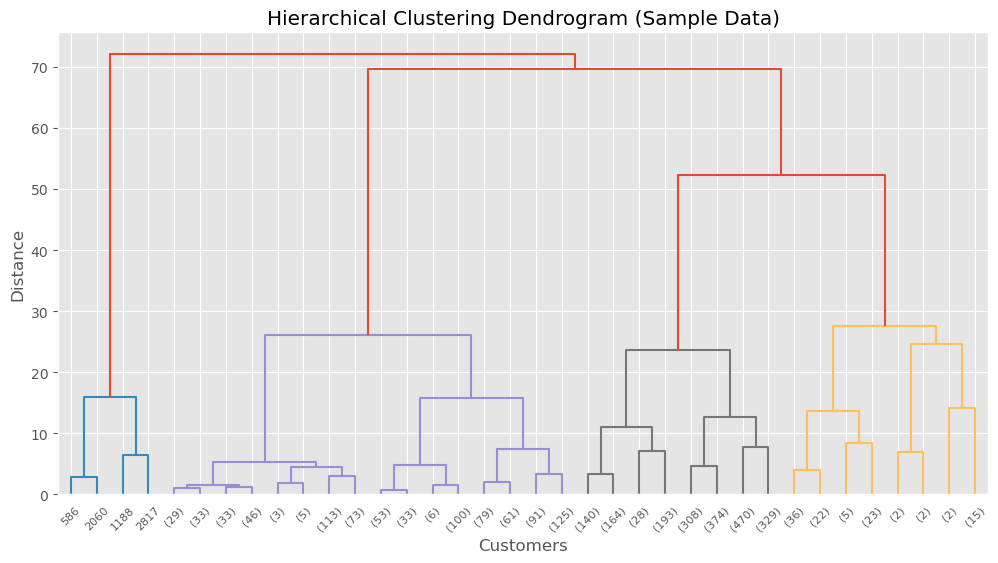

In [40]:
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (Sample Data)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [41]:
agglo = AgglomerativeClustering(n_clusters=4)
rfm["Agglo_Cluster"] = agglo.fit_predict(rfm_scaled)

In [42]:
print("KMeans cluster distribution:")
print(rfm["Cluster"].value_counts())

print("\nHierarchical cluster distribution:")
print(rfm["Agglo_Cluster"].value_counts())

KMeans cluster distribution:
Cluster
0    3054
1    1067
3     204
2      13
Name: count, dtype: int64

Hierarchical cluster distribution:
Agglo_Cluster
2    3325
3     949
0      56
1       8
Name: count, dtype: int64


### Clustering Algorithm Comparison Insight

Both KMeans and Hierarchical clustering produced comparable customer groupings, identifying a small set of high-value customers and a larger population of low-engagement customers. However, KMeans clustering resulted in more balanced and interpretable cluster sizes, while hierarchical clustering produced extremely small clusters that are less practical for business application. Based on scalability, interpretability, and deployment readiness, KMeans was selected as the final clustering approach.

In [43]:
comparison = rfm.groupby("Agglo_Cluster")[["Recency", "Frequency", "Monetary"]].mean()
comparison

,Recency,Frequency,Monetary
Agglo_Cluster,,,
0,24.928571,43.785714,31348.385536
1,11.000000,43.875000,164658.498750
2,46.205414,4.305263,1625.457204
3,259.542677,1.489989,457.307820


### Conclusion from Comparison

Hierarchical clustering revealed customer behavior patterns similar to KMeans but resulted in highly imbalanced clusters, including extremely small segments that are less actionable for business decision-making. Additionally, hierarchical clustering incurs higher computational cost and limited scalability for large datasets. In contrast, KMeans produced more balanced, interpretable clusters and is better suited for deployment in real-time applications. Therefore, KMeans was selected as the final clustering model.

## 9. Product Recommendation System

An item-based collaborative filtering approach was implemented to recommend products based on customer purchase behavior. Cosine similarity was used to measure similarity between products.

In [44]:
# Use cleaned data
rec_data = data[["CustomerID", "Description", "Quantity"]]

In [45]:
customer_product_matrix = rec_data.pivot_table(
    index="CustomerID",
    columns="Description",
    values="Quantity",
    aggfunc="sum",
    fill_value=0
)

In [46]:
product_customer_matrix = customer_product_matrix.T

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(product_customer_matrix)

In [48]:
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_customer_matrix.index,
    columns=product_customer_matrix.index
)

In [49]:
def recommend_products(product_name, similarity_df, top_n=5):
    if product_name not in similarity_df.index:
        return "Product not found in the dataset."
    
    similar_scores = similarity_df[product_name].sort_values(ascending=False)
    recommended_products = similar_scores.iloc[1:top_n+1]
    
    return recommended_products

In [50]:
recommend_products(
    product_name="WHITE HANGING HEART T-LIGHT HOLDER",
    similarity_df=product_similarity_df,
    top_n=5
)

Description
GIN + TONIC DIET METAL SIGN         0.750410
RED HANGING HEART T-LIGHT HOLDER    0.658719
WASHROOM METAL SIGN                 0.643500
LAUNDRY 15C METAL SIGN              0.642206
GREEN VINTAGE SPOT BEAKER           0.631461
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

### Interpretation

The recommended products exhibit high cosine similarity scores, indicating that they are frequently co-purchased by the same customers. 
This suggests strong behavioral association between these items, validating the effectiveness of the item-based collaborative filtering approach. 
Such recommendations can be leveraged to enhance cross-selling strategies and personalized product suggestions in an e-commerce setting.

## 10. Product Similarity Heatmap

A heatmap visualization was generated to analyze product-product similarity based on cosine similarity scores. This provides a visual validation of the recommendation system.

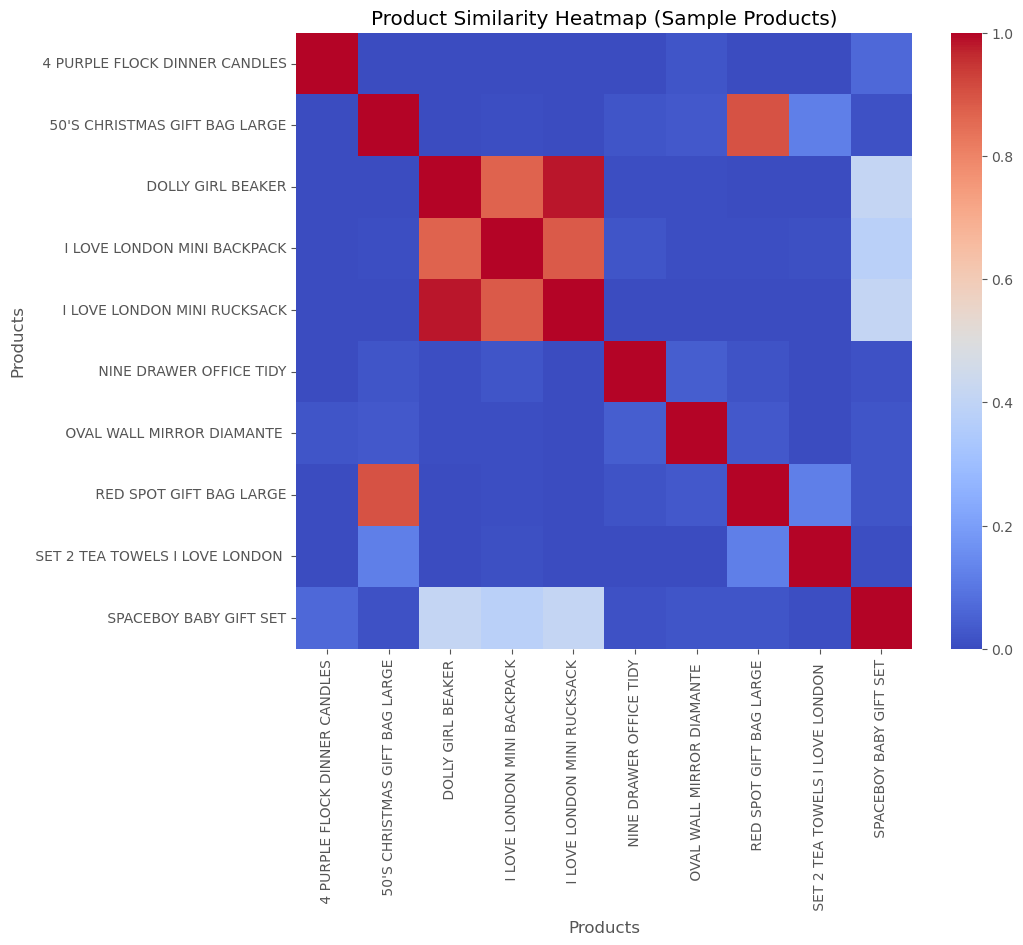

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Take a small subset of products for visualization
sample_similarity = product_similarity_df.iloc[:10, :10]

plt.figure(figsize=(10, 8))
sns.heatmap(
    sample_similarity,
    cmap="coolwarm",
    square=True
)

plt.title("Product Similarity Heatmap (Sample Products)")
plt.xlabel("Products")
plt.ylabel("Products")
plt.show()

### Heatmap Interpretation

The product similarity heatmap visually represents cosine similarity scores between selected products. 
Darker color intensities indicate stronger similarity, suggesting frequent co-purchase behavior among those product pairs. 
The presence of distinct high-similarity blocks confirms that the recommendation system successfully captures meaningful product relationships, 
providing additional visual validation of the item-based collaborative filtering approach.

## 11. Streamlit Application Overview

A Streamlit-based web application was developed to demonstrate real-time product recommendations and customer segmentation. The application allows users to input a product name to receive recommendations and enter RFM values to predict customer segments.

### Conclusion and Future Scope

#### Conclusion

This project successfully analyzed customer purchasing behavior using online retail transaction data through RFM-based customer segmentation and item-based collaborative filtering. The preprocessing and exploratory data analysis steps ensured data quality and revealed key purchasing patterns across customers, products, and time.

KMeans clustering effectively grouped customers into meaningful segments such as High-Value, Regular, Occasional, and At-Risk customers based on Recency, Frequency, and Monetary attributes. These segments provide actionable insights that can support targeted marketing strategies, customer retention initiatives, and revenue optimization.

The product recommendation system, built using cosine similarity, demonstrated strong capability in identifying products that are frequently co-purchased. The recommendation outputs and similarity heatmap visually validated the effectiveness of the collaborative filtering approach. Furthermore, the Streamlit application showcased the practical deployment of the model by enabling real-time customer segmentation and product recommendations.


#### Future Scope

Future enhancements to this project may include incorporating customer demographic information to improve segmentation accuracy and personalization. Advanced recommendation techniques such as matrix factorization, hybrid recommendation models, or deep learning-based approaches can be explored to improve recommendation quality.

The system can also be extended to support real-time data ingestion and deployed on a cloud platform for scalability. Additionally, further enhancements to the Streamlit application, such as advanced dashboards and business-oriented visual analytics, can improve decision-making support for stakeholders.